**Initialization and Setup**

In [227]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

conn=sqlite3.connect('data/database.sqlite')
cur=conn.cursor()

**Load tables from database**

In [247]:
country = pd.read_sql_query('SELECT * from Country;',conn)
league = pd.read_sql_query('SELECT * from League;',conn)
match = pd.read_sql_query('SELECT * from Match;',conn)
player=pd.read_sql_query('SELECT * from Player;',conn)
player_atr=pd.read_sql_query('SELECT * from Player_Attributes;',conn)
team=pd.read_sql_query('SELECT * from Team;',conn)
team_atr=pd.read_sql_query('SELECT * from Team_Attributes;',conn)

In [253]:
country['league']=league['name']
country

,id,name,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [70]:
match[['match_api_id','home_team_api_id','away_team_api_id']].sort_values(by='home_team_api_id',ascending=False)

,match_api_id,home_team_api_id,away_team_api_id
1364,1717989,274581,9991
1276,1717909,274581,9994
1548,1979948,274581,9986
1444,1717845,274581,9985
1564,1979964,274581,8203
1259,1717892,274581,8203
1580,1979844,274581,9997
1588,1979980,274581,8475
1420,1718045,274581,10001
1612,1980004,274581,9994


England Premier League season 2015/2016

In [120]:
df=match[(match['season']=='2015/2016') & (match['league_id']==1729)]
drop=df.iloc[:,11:115]
df.drop(drop,axis=1,inplace=True)
df.drop(df.columns[0:7],axis=1,inplace=True)

In [121]:
df.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
4388,9825,8654,0,2
4389,8678,10252,0,1
4390,8455,10003,2,2
4391,8668,9817,2,2
4392,8197,8472,4,2
4393,10260,8586,1,0
4394,10261,8466,2,2
4395,9850,9826,1,3
4396,10194,8650,0,1
4397,8659,8456,0,3


In [230]:
t_avg=t_atr.groupby(['team_api_id']).mean()
# t_avg.describe()
t_avg

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,,,
1601,1115.5,874.0,47.333333,48.0,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333
1773,942.0,100087.0,52.000000,51.0,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000
1957,621.5,110745.0,47.166667,54.0,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667
2033,930.0,111540.0,49.000000,62.0,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000
2182,697.5,873.0,60.333333,52.5,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000
2183,999.5,1570.0,32.750000,NaN,44.250000,48.000000,49.750000,59.250000,49.500000,40.750000,51.500000
2186,333.0,110747.0,41.400000,50.0,46.200000,55.400000,49.600000,52.200000,59.000000,44.400000,61.800000
4087,413.0,111271.0,52.000000,43.0,50.600000,51.600000,58.200000,58.400000,46.600000,53.200000,53.000000
4170,223.0,111376.0,48.000000,NaN,34.000000,39.000000,59.000000,58.333333,50.000000,53.000000,67.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4388 to 4767
Data columns (total 4 columns):
home_team_api_id    380 non-null int64
away_team_api_id    380 non-null int64
home_team_goal      380 non-null int64
away_team_goal      380 non-null int64
dtypes: int64(4)
memory usage: 14.8 KB


In [173]:
df.sort_values(by='home_team_api_id').head(50)

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
4621,8197,10261,1,0
4721,8197,10252,3,2
4461,8197,8455,2,1
4738,8197,9825,2,5
4491,8197,8456,0,0
4421,8197,9817,2,1
4691,8197,8668,3,1
4511,8197,8678,0,0
4541,8197,10194,3,0
4671,8197,10003,4,0


In [240]:
df['result']=df['home_team_goal']-df['away_team_goal']
df['win']=np.where(df['result']>0,'H',np.where(df['result']<0,'A','D'))
df['score']=np.where(df['result']>0,3,np.where(df['result']<0,0,1))
df.merge(t[['team_api_id','team_short_name']],left_on='home_team_api_id',right_on='team_api_id').drop('team_api_id',axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,win,score,team_short_name
0,9825,8654,0,2,-2,A,0,ARS
1,9825,8668,2,1,1,H,3,ARS
2,9825,8586,1,1,0,D,1,ARS
3,9825,8472,3,1,2,H,3,ARS
4,9825,8456,2,1,1,H,3,ARS
5,9825,8678,2,0,2,H,3,ARS
6,9825,10261,1,0,1,H,3,ARS
7,9825,8455,0,1,-1,A,0,ARS
8,9825,8466,0,0,0,D,1,ARS
9,9825,8197,2,1,1,H,3,ARS


In [243]:
df['team_short_name']#,'score']].groupby(df['team_short_name']).sum()

KeyError: 'team_short_name'

In [229]:
from sklearn.model_selection import train_test_split 

In [ ]:
X=t_

KeyError: 'team_short_name'

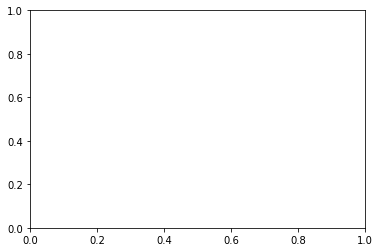

In [244]:
fig,ax=plt.subplots()
ax.plot(df['win'],df['team_short_name'])